In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Input data type

In [3]:
zeroformat=True

In [184]:
dir = "/home/rita13santos/Desktop/now/run16"#1

1D output format

In [85]:
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]

k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]
derderxi_scri=[]



k=1

for var in vars:
    dir = "/home/rita13santos/Desktop/now/run21/{}.txt".format(var)
        
        
        
    
    print(dir)

    with open(dir) as f:
        for line in f:
            index = line.find("Time")
            if index==1:
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                elif a==[]:
                    grid.append(auxgrid)
                    if k==1:
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[len(auxdata)-4])
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[len(auxdata)-4])
                    elif k==3:
                        xi_ori.append(auxdata[3])
                        xi_scri.append(auxdata[len(auxdata)-4])
                    elif k==4:
                        derxi_ori.append(auxdata[3])
                        derxi_scri.append(auxdata[len(auxdata)-4])
                    elif k==5:
                        derderxi_ori.append(auxdata[3])
                        derderxi_scri.append(auxdata[len(auxdata)-4])
                        
                    
    k=k+1



/home/rita13santos/Desktop/now/run21/m.txt
/home/rita13santos/Desktop/now/run21/beta.txt
/home/rita13santos/Desktop/now/run21/xi.txt
/home/rita13santos/Desktop/now/run21/derxi.txt
/home/rita13santos/Desktop/now/run21/derderxi.txt


0D output format

In [185]:
res=1
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]
"""m=[]
beta=[]
xi=[]
derxi=[]"""
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]

maxmonitorratio=[]

for var in vars:
    
    
    subdir = dir+"/{}.txt".format(var)

    
    print(subdir)
    
    if zeroformat==False: ## reading 2D data
        t=0
        with open(subdir) as f:
            for line in f:

                index = line.find("Time")

                if index==1:
                    t=t+1
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]


                else:

                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))

                    elif a==[]:


                        if k==1:
                            if t==1:
                                grid.append(auxgrid)
                            L=len(auxgrid)
                            m_ori.append(auxdata[3])
                            m_scri.append(auxdata[L-4])



                            monitor_ratio=[]
                            i=4
                            for m in auxdata[4:L-4]:
                                monitor_ratio.append(2*m/grid[0][i]*(1-grid[0][i]))
                                i=i+1
                            maxmonitorratio.append(np.max(monitor_ratio))




                        elif k==2:
                            beta_ori.append(auxdata[3])
                            beta_scri.append(auxdata[L-4])
                        elif k==3:
                            xi_ori.append(auxdata[3])
                            xi_scri.append(auxdata[L-4])
                        elif k==4:
                            derxi_ori.append(auxdata[3])
                            derxi_scri.append(auxdata[L-4])
                        elif k==5:
                            derderxi_ori.append(np.max(auxdata[3]))
    else: ## reading 0D data
        with open(subdir) as f:
            i=0
            for line in f:
                i=i+1
                a=line.split()
                #print("i = ", i, " a = ", a)
            
            
            
                #a=line.split()
            
                if k==1:
                    time.append(float(a[0]))
                    m_ori.append(float(a[1]))
                    m_scri.append(float(a[2]))
                elif k==2:
                    beta_ori.append(float(a[1]))
                    beta_scri.append(float(a[2]))
                elif k==3:
                    xi_ori.append(float(a[1]))
                    xi_scri.append(float(a[2]))
                elif k==4:
                    derxi_ori.append(float(a[1]))
                    derxi_scri.append(float(a[2]))
                elif k==5:
                    derderxi_ori.append(float(a[1]))
                
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/now/run16/m.txt
/home/rita13santos/Desktop/now/run16/beta.txt
/home/rita13santos/Desktop/now/run16/xi.txt
/home/rita13santos/Desktop/now/run16/derxi.txt
/home/rita13santos/Desktop/now/run16/derderxi.txt


/home/rita13santos/Desktop/now/run16/monitorratio.txt


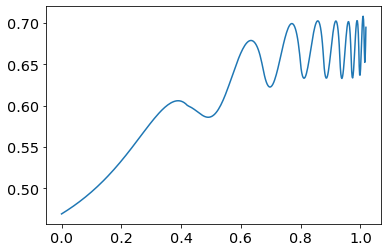

In [186]:
maxmonitorratio=[]

auxtime=[]
    
subdir = dir+"/monitorratio.txt"

grid=[] 
print(subdir)
## reading 2D data
t=0

with open(subdir) as f:
    for line in f:
        
        index = line.find("Time")

        if index==1:
            t=t+1
            
            auxtime.append(float(line[index+7:len(line)-1]))
            
            auxgrid=[]
            auxdata=[]


        else:

            a=line.split()
            if a!=[]:
                
                auxgrid.append(float(a[0]))
                auxdata.append(float(a[1]))

            elif a==[]:


                    
                if t==1:
                    grid.append(auxgrid)
                L=len(auxgrid)

                maxmonitorratio.append(np.max(auxdata))
                    
#count=len(datatime[2])+1
#count

len(maxmonitorratio)

plt.plot(auxtime,maxmonitorratio)

####

In [187]:
maxmonitorratio[0]

0.46895830206

# Styling plots

In [188]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':18,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Convert central time to Bondi time

In [189]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

#convert central time to bondi time
"""def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(beta_scri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)"""
def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.exp(np.multiply(beta_scri,2)), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)

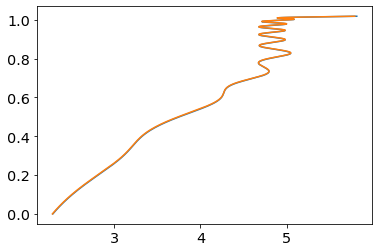

In [190]:
y=converttobondi(time,beta_scri)


dy=[]
edoisbeta=[]
for i in range(0, len(y)-1):
    dd=(y[i+1]-y[i])/(time[i+1]-time[i])
    dy.append(dd)
    edoisbeta.append(np.exp(2*beta_scri[i]))
    
plt.plot(dy,time[0:len(dy)])
plt.plot(edoisbeta,time[0:len(dy)])
#dy/dtime==e2beta

#print(dy)
#print(edoisbeta)

# Chi at origin

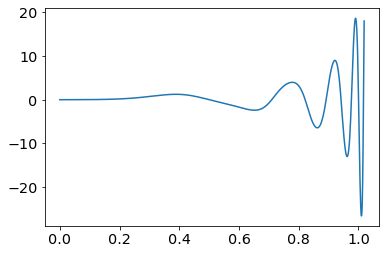

In [191]:
plt.plot(time, derderxi_ori)

Finding zero crossings

In [196]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
#print(roots[k:(k+3)+1])


"""for kkkk in range(0,len(roots)-4):
    tau_star=(roots[0+kkkk]*roots[3+kkkk]-roots[1+kkkk]*roots[2+kkkk])/(roots[0+kkkk]-roots[1+kkkk]-roots[2+kkkk]+roots[3+k])

    print("Delta is ", 2*math.log((tau_star-roots[kkkk])/(tau_star-roots[kkkk+1])), " for k =", kkkk)"""

k=3

tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report")

Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
print("\nDelta is ", Delta)

Number of zero crossing is  8

Tau star is  1.0537528604364894
Tau* is u* in my report

Delta is  0.7374608907648385


Using multiple crossings

In [195]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
#print(roots[k:(k+3)+1])


"""for kkkk in range(0,len(roots)-4):
    tau_star=(roots[0+kkkk]*roots[3+kkkk]-roots[1+kkkk]*roots[2+kkkk])/(roots[0+kkkk]-roots[1+kkkk]-roots[2+kkkk]+roots[3+k])

    print("Delta is ", 2*math.log((tau_star-roots[kkkk])/(tau_star-roots[kkkk+1])), " for k =", kkkk)"""


kk=range(0,4)

final_Delta=[]
final_tau_star=[]
for k in kk:
    tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
    #print("\nTau star is ", tau_star)
    #print("Tau* is u* in my report")

    Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
    #print("\nDelta is ", Delta)
    
    if abs(Delta-0.73)<0.01:
        print("\nDelta is ", Delta)
        final_Delta.append(Delta)
        final_tau_star.append(tau_star)
        
avg=np.average(final_Delta)
tau=np.average(final_tau_star)


print("average is ", avg, " std dev is ",max(final_Delta, key=lambda x: abs(x - avg))-avg)
print("average is ", tau, " std dev is ",max(final_tau_star, key=lambda x: abs(x - tau))-tau)

Number of zero crossing is  8

Delta is  0.7374608907648385
average is  0.7374608907648385  std dev is  0.0
average is  1.0537528604364894  std dev is  0.0


In [143]:
tau_star=tau
Delta=avg

In [144]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

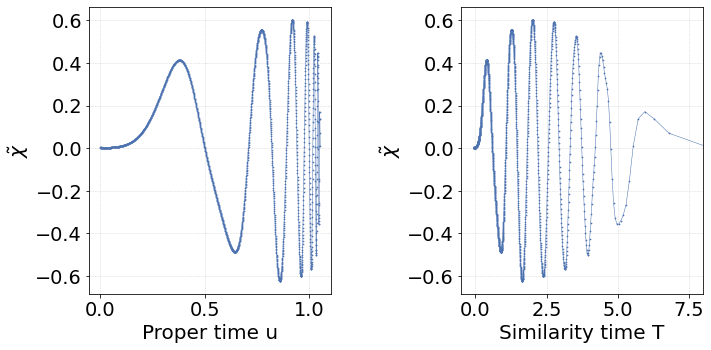

In [145]:
chitilde=[]
i=0
for tt in adapt_time:
    
    aux=np.exp(-tt)*1/2*derderxi_ori[i] #chi tilde = e^-T chi = e^-T (1/2 xi,rr)
    chitilde.append(aux)
    i=i+1

with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(time[0:len(chitilde)],chitilde,linewidth=0.5)
    ax1.scatter(time[0:len(chitilde)],chitilde,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=20)
    ax1.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([1,1.1])
    
    ax2.plot(adapt_time,chitilde,linewidth=0.5)
    ax2.scatter(adapt_time,chitilde,s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5, 8])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

In [205]:
len(grid[0])

1999

Compactness

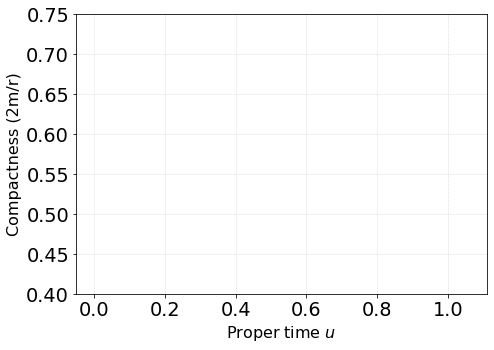

In [110]:
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16


    plt.plot(auxtime,maxmonitorratio,linewidth=0.7)
    plt.scatter(auxtime,maxmonitorratio,s=0.2,alpha=0.8)
    #plt.plot(converttobondi(time,beta_scri),maxmonitorratio,linewidth=0.5)
    #plt.scatter(converttobondi(time,beta_scri),maxmonitorratio,s=0.2,alpha=0.8)
    
    plt.xlim(-0.05, 1.11)
    plt.ylim(0.4, 0.75)
    plt.xlabel("Proper time $u$")#$\u03C4$")
    plt.ylabel("Compactness (2m/r)")#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    plt.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

News function

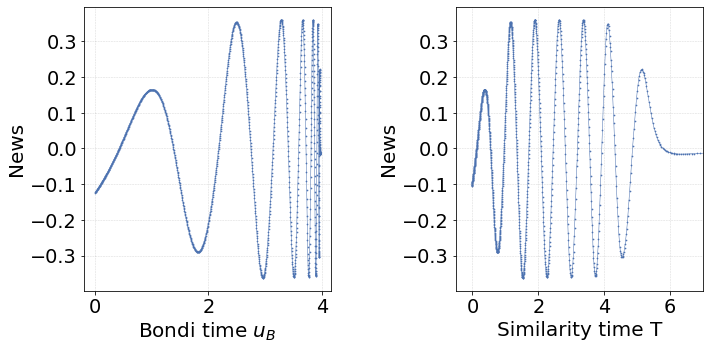

In [25]:
news=[]
for i in range(0, len(xi_scri)-1):
    
    #these look flat
    new=np.sqrt(2)*np.exp(2*beta_scri[i])*(xi_scri[i+1]-xi_scri[i])/(bonditime[i+1]-bonditime[i])#*
    new=np.sqrt(2)*(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])#*
    
    
    #new=np.sqrt(1/(-4*math.pi) *np.exp(-2*beta_scri[i])*(m_scri[i+1]-m_scri[i])/(time[i+1]-time[i]))#*
    news.append(new)
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'

    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(bonditime[0:len(adapt_time)],news[0:len(adapt_time)],linewidth=0.5)
    ax1.scatter(bonditime[0:len(adapt_time)],news[0:len(adapt_time)],s=0.5)
    ax1.set_xlabel("Bondi time $u_B$",fontsize=20)
    ax1.set_ylabel("News",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax1.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2, 0.3])
    
    ax2.plot(adapt_time[20:len(adapt_time)],news[20:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time[20:len(adapt_time)],news[20:len(adapt_time)],s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel("News",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax2.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2, 0.3])
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5,7])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

m at scri+

/tmp/ipykernel_11224/2306096497.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim([0.0001,0.0000])


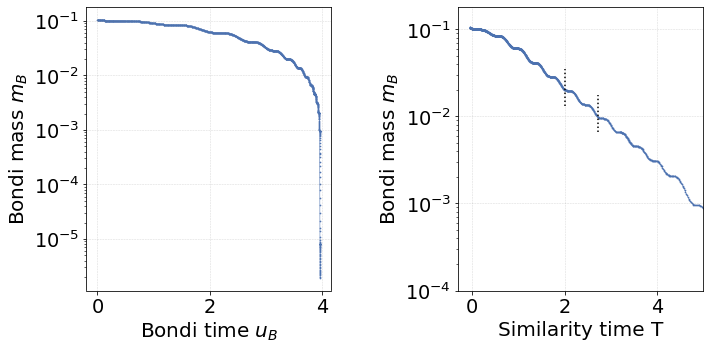

In [37]:
mplt=[]

i=0
for tt in adapt_time:
    
    aux=m_scri[i]#np.exp(-tt)*1/2*m_scri[i]
    mplt.append(aux)
    i=i+1
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    
    # time
    #ax1.scatter(bonditime[0:len(mplt)],mplt[0:len(mplt)],s=0.5)
    #ax1.plot(bonditime[0:len(mplt)],mplt[0:len(mplt)],linewidth=0.5)
    ax1.scatter(bonditime[0:len(mplt)],mplt,s=0.5)
    ax1.plot(bonditime[0:len(mplt)],mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([3.85,4])
    
    ax1.set_yscale('log')
    #ax1.set_xlabel("$\u03C4$")#T
    ax1.set_xlabel("Bondi time $u_B$", fontsize=20)#$\u03C4$")
    
    # adapt time
    
    #ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    #ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.plot(adapt_time,np.array(mplt),linewidth=0.5)
    ax2.scatter(adapt_time,np.array(mplt),s=0.5)
    ax2.set_yscale('log')
    ax2.set_xlim([-0.3,5])
    ax2.set_ylim([0.0001,0.0000])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax2.set_xlabel("Similarity time T", fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    ax2.axvline(2,0.65,0.78,color='k',linestyle='dotted')
    ax2.axvline(2.73,0.56,0.69,color='k', linestyle='dotted')

    fig.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

numerical vs analytical mass loss

In [112]:
#chi,u
deruxi = []

for i in range(0, len(xi_scri)-1):
    aux=(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    deruxi.append(aux)

#theoretical mass loss

massloss=[]

for i in range(0, len(xi_scri)-1):
    aux=-8*math.exp(-4*beta_scri[i])*math.pi*deruxi[i]**2#this is m,ub, so its eq:masslossanalyticalym but translated to bondi
    #-8*math.exp(-2*beta_scri[i])*math.pi*deruxi[i]**2
    massloss.append(aux)



In [113]:
#experimental mass loss
masslossexp=[]
for i in range(0, len(m_scri)-1):
    aux=(m_scri[i+1]-m_scri[i])/(bonditime[i+1]-bonditime[i])##eq.59 from my report ref eq:news
    masslossexp.append(aux)

In [114]:
colors= plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))                                      
#E24A33

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


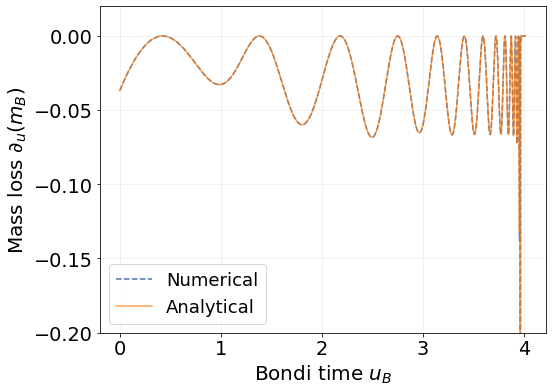

In [134]:

with plt.style.context('seaborn-v0_8-deep'):
    
    
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16


    
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1.5,linestyle="dashed")
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1.5,alpha=0.7,color='#ff7f0e')
    
    #plt.xlim(-0.01, 0.165)
    plt.xlabel("Bondi time $u_B$", fontsize=20)#$\u03C4$")
    plt.ylabel("Mass loss $\partial_u(m_B)$", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.ylim([-0.2,0.02])
    
    plt.legend(fontsize=18);

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

Redshift factor

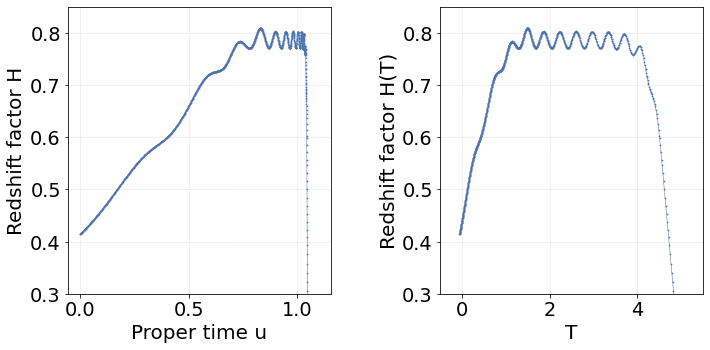

In [61]:
redshift=[]
for i in range(0, len(beta_scri)):
    #redshift.append(math.exp(2*beta[i][len(beta[0])-4])-1)
    #redshift.append(math.exp(2*beta_scri[i])-1)
    redshift.append(beta_scri[i])
    
with plt.style.context('seaborn-v0_8-deep'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,redshift,linewidth=0.5)
    ax1.scatter(time,redshift,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=20)#"$\u03C4$")
    ax1.set_ylabel("Redshift factor H",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax1.set_ylim([0.3,0.85])
    
    ax2.plot(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],s=0.5)
    ax2.set_xlim([-0.5,5.5])
    ax2.set_ylim([0.3,0.85])
    ax2.set_xlabel("T",fontsize=20)
    ax2.set_ylabel("Redshift factor H(T)",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    fig.tight_layout(pad=3.0)
    
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [90]:
ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([0,2])
    #ax2.set_ylim([0.01,0])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax2.set_xlabel("Similarity time T", fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)

    fig.tight_layout(pad=3.0)

IndentationError: unexpected indent (124731751.py, line 2)

Bondi mass at scri+

In [ ]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('seaborn-v0_8-deep'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(time,mplt,s=0.5)
    ax1.plot(time,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    ax1.set_xlabel("$\u03C4$")#T
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.show()

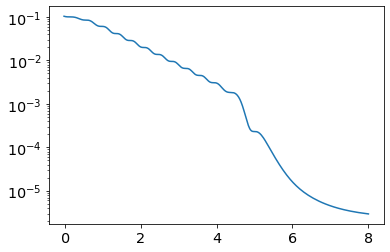

In [91]:
plt.plot(adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]))
plt.yscale('log')

# Mass Scaling

In [3]:
from scipy.optimize import curve_fit

In [4]:
dir = "/home/rita13santos/Desktop/6jun"#1
dir = "/home/rita13santos/Desktop/now"


In [5]:
masses=[]
amplitudes=[]




#subdir = dir+"/parameters2.csv"
subdir = dir+"/parameters.csv"


    
import csv

with open(subdir) as f:
    i=0
    
    reader = csv.DictReader(f)
    
    for row in reader:
        
        print("A* ", row['Column2'], "mass ", row['Column8'])
        amplitudes.append(float(row['Column2']))
        masses.append(float(row['Column8']))


A*  0.08864099210569418 mass  0.0
A*  0.08864099210569418 mass  0.7024446741091147
A*  0.08864098990116556 mass  0.7024399561175781
A*  0.08864098626651233 mass  0.7024321769944858
A*  0.08864098027398225 mass  0.7024193501121324
A*  0.08864097039397044 mass  0.7023981986877842
A*  0.08864095410458481 mass  0.7023633164530902
A*  0.08864092724792823 mass  0.7023058064879927
A*  0.08864088296878728 mass  0.7022109976039318
A*  0.08864080996482573 mass  0.702054727515767


supercritical

In [51]:
masses=[0.0012732194210713923,
 0.0018218267212426853,
 0.0021883001465992907,
 0.0025558839852811697,
 0.00310811902778121,
 0.003569260110280827,
 0.0038468927534141707,
 0.004310654109647128,
 0.004682730977977733]+[0.007021208573111742,
 0.007776356396449991,
 0.008534110908021494,
 0.009390237218766303,
 0.010442923227081086,
 0.01150116424238681,
 0.012662480184685748,
 0.013831916398949453,
 0.0155972233578369,
 0.017082333047972624,
 0.018679155787222186,
 0.020490122489609488,
 0.02303605218527212,
 0.025202412682073575,
 0.027600974006300738]+[0.03002889439380779,
 0.03345917881255352,
 0.03694941500550924,
 0.04084039583193432,
 0.04503415305737698,
 0.04687410780380682,
 0.054887465804370976,
 0.06247420983095015,
 0.07124518819904598,
 0.08092700685490754,
 0.08530820750383977,
 0.10874130864352868,
 0.13322831900633306,
 0.15899085843207741,
 0.1718628170036847,
 0.21575627304850623,
 0.28100669282884977,
 0.3940732502679985,
 0.6185609102066362,
 1.1035158127183151]+[0.005240310497274272, 0.005801755069278771, 0.006363467198369135]
amplitudes=[0.08864099556620345,
 0.0886409956065808,
 0.08864099567315178,
 0.08864099578290881,
 0.08864099626221804,
 0.08864099675411487,
 0.08864099756511562,
 0.08864099890222982,
 0.08864100110675843]+[0.08864103690333919,
 0.08864106375999577,
 0.08864110803913672,
 0.08864118104309826,
 0.0886413014062825,
 0.08864149985162456,
 0.0886418270326811,
 0.08864236646304838,
 0.08864325583336898,
 0.08864472215713408,
 0.08864713971631533,
 0.08865112559756062,
 0.08865769720475224,
 0.08866853195331174,
 0.08868639543372449]+[0.0887158473338497,
 0.08876440530804867,
 0.08884446387297264,
 0.08897645813186451,
 0.08919407987410984,
 0.08955287746951651,
 0.09014443469693957,
 0.09111974768062836,
 0.09272776694242607,
 0.09537894250304746,
 0.0997499920422043,
 0.10695663439269618,
 0.11883837892628049,
 0.13842806387182593,
 0.1707259941278608,
 0.22397627874057469,
 0.31177115565239183,
 0.4565204366754043,
 0.6951716552165954,
 1.088640995503962]+[0.08864100474141166, 0.08864101073394175, 0.08864102061395356]

In [9]:

Astar=0.0886409955039620

filtered_amplitudes, filtered_masses = zip(*[(a, m) for a, m in zip(amplitudes, masses) if -20.5 <= math.log(-(a-Astar)) <= -4.5])

print(list(filtered_amplitudes))  # Filtered x values
print(list(filtered_masses))  # Corresponding filtered y values

[0.0886406896016415, 0.0886406896016415, 0.08864049115629943, 0.0886401639752429, 0.08863962454487562, 0.08863873517455502, 0.08863726885078992, 0.08863485129160867, 0.08863086541036337, 0.08862429380317176, 0.08861345905461225, 0.0885955955741995, 0.0885661436740743]
[0.0, 0.7017971228275937, 0.7013725394622681, 0.7006729492332214, 0.6995205918900904, 0.6984195635794643, 0.697941122120777, 0.6971528911040653, 0.695854886158076, 0.693723519684998, 0.6902222172583962, 0.6844942823019813, 0.6751634242621614]


subcritical

In [6]:
amplitudes=[0.0886406896016415,
0.08864049115629943,  
0.0886401639752429, 
0.08863962454487562, 
0.08863873517455502, 
0.08863726885078992, 
0.08863485129160867, 
0.08863086541036337, 
0.08862429380317176, 
0.08861345905461225, 
0.0885955955741995,   
0.0885661436740743,   
0.08864099549007405,  
0.08864099548106465,  
0.08864099546621065,  
0.08864099544172055,  
0.0886409954013432,   
0.08864099533477221,  
0.08864099522501519,  
0.08864099504405645,  
0.08864099474570596,  
0.08864099425380913,  
0.08864099344280837]+[0.08864099210569418, 0.08864098990116556, 0.08864098626651233, 0.08864098027398225, 0.08864097039397044, 0.08864095410458481, 0.08864092724792823, 0.08864088296878728, 0.08864080996482573]

masses=[0.7017971228275937, 0.7013725394622681, 0.7006729492332214, 0.6995205918900904, 0.6984195635794643, 0.697941122120777, 0.6971528911040653, 0.695854886158076, 0.693723519684998, 0.6902222172583962, 0.6844942823019813, 0.6751634242621614, 0.7024519222099642, 0.7024519029055154, 0.7024518710776907, 0.7024518186023948, 0.7024517320854639, 0.7024515894428159, 0.7024513542644839, 0.7024509665197008, 0.7024503272335, 0.7024492732200819, 0.7024475356109777]+[0.7024446741091147, 0.7024399561175781, 0.7024321769944858, 0.7024193501121324, 0.7023981986877842, 0.7023633164530902, 0.7023058064879927, 0.7022109976039318, 0.702054727515767]

In [7]:
Astar=0.0886409955039620

filtered_amplitudes, filtered_masses = zip(*[(a, m) for a, m in zip(amplitudes, masses) if m>0])

In [12]:
#amplitudes=amplitudes[1:len(amplitudes)]
#masses=masses[1:len(masses)]

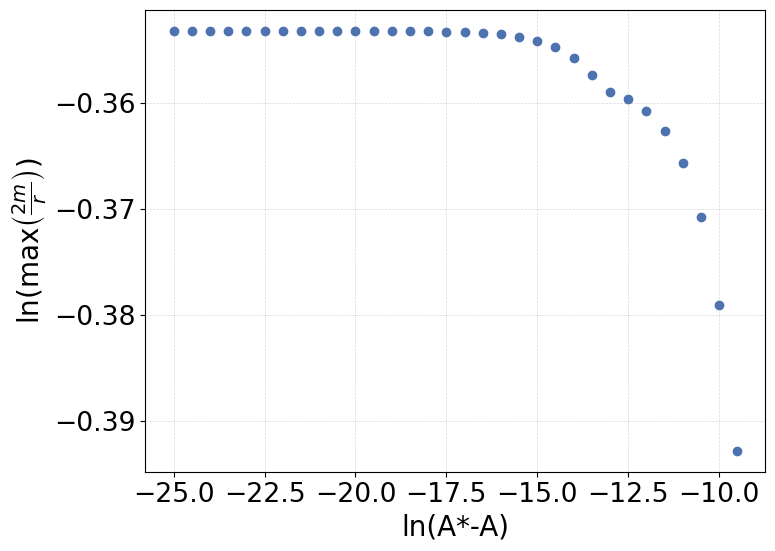

[-0.00127897 -0.37947242]


-0.0012789744143457407

In [18]:

xx=[]
yy=[]

i=0
for x in filtered_amplitudes:
    
    xx.append(math.log(-(x-Astar)))
    yy.append(math.log(filtered_masses[i]))
    #print("A is ", x)
    #print("xx is ", xx[i])
    #print("mass is ", filtered_masses[i])
    #print("yy is ", yy[i])
    i=i+1
        
#xx=xx[2:len(xx)-11]
#yy=yy[2:len(yy)-11]




def func(x, a, b):

    return a * x + b


popt, pcov = curve_fit(func, xx, yy)

fit_eval=[]
for x in xx:
    fit_eval.append(func(x, popt[0], popt[1]))

    

with plt.style.context('seaborn-v0_8-deep'):
    #plt.figure(figsize=(8,6))
    plt.rcParams["figure.figsize"] = (8,6)
    #plt.rcParams["font.size"]= 20
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    #plt.rcParams["legend.fontsize"]= 18
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    plt.scatter(xx,yy)
    
    #plt.plot(xx, fit_eval, 'r-',linewidth=1.5,alpha=0.7,color='#1f77b4')
    
    plt.xlabel("ln(A*-A)", fontsize=20)#$\u03C4$")
    #plt.ylabel(r"ln(m$_{BH}$)", fontsize=20)#$\u03C4$")
    plt.ylabel(r"ln(max$\left(\frac{2m}{r}\right)$)", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    #plt.legend(fontsize=18);

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    #plt.xlim(-19,-26)
    #plt.ylim(-0.354,-0.3530)
    plt.show()



print(popt)
popt[0]

In [15]:
perr=np.sqrt(np.diag(pcov))

In [27]:
xx

[-14.999999999999124,
 -14.50000000000811,
 -14.00000000000072,
 -13.500000000002762,
 -13.00000000000142,
 -12.49999999999926,
 -11.999999999999877,
 -11.50000000000047,
 -11.000000000000384,
 -10.500000000000023,
 -9.99999999999987,
 -9.499999999999995,
 -24.999999821173994,
 -24.499999902795903,
 -24.00000004569479,
 -23.49999996983444,
 -22.99999994126316,
 -22.500000030032744,
 -21.99999999710303,
 -21.499999986218572,
 -21.000000001981277,
 -20.499999997018836,
 -19.99999999983492]

In [28]:
yy

[-0.3541109155456244,
 -0.35471609308002316,
 -0.35571404969804804,
 -0.3573600472968954,
 -0.35893526285098576,
 -0.3596205320401139,
 -0.3607505363166925,
 -0.36261413728553366,
 -0.3656817844734053,
 -0.37074167924141344,
 -0.3790749873900821,
 -0.39280050739549105,
 -0.3531783182515145,
 -0.35317834573303813,
 -0.3531783910426533,
 -0.35317846574570416,
 -0.35317858890993264,
 -0.3531787919739382,
 -0.353179126770492,
 -0.3531796787587368,
 -0.35318058883861747,
 -0.3531820893208124,
 -0.353184562967408]

In [16]:
print("We obtain a gamma value of ",popt[0]," +/ ",perr[0])#<5.5

We obtain a gamma value of  -0.005620869089528968  +/  0.0009580552729969072


In [119]:
perr[1]

0.011796986290560035

In [115]:
0.19714 + 0.00074

0.19788

In [116]:
0.19771291046779688  -  0.0008819534728647026

0.19683095699493217

In [56]:
popt
pcov

np.sqrt(np.diag(pcov))

array([0.00091385, 0.0123919 ])

In [57]:
xx

[-20.499999997018836,
 -19.99999999983492,
 -19.499999999874753,
 -19.00000000042903,
 -16.999999999941426,
 -16.49999999991023,
 -15.999999999988614,
 -15.499999999991473,
 -14.999999999999124,
 -14.50000000000811,
 -14.00000000000072,
 -13.500000000002762,
 -13.00000000000142,
 -12.49999999999926,
 -11.999999999999877,
 -11.50000000000047,
 -11.000000000000384,
 -10.500000000000023,
 -9.99999999999987,
 -9.499999999999995,
 -9.00000000000002,
 -8.500000000000021,
 -7.999999999999987,
 -7.499999999999991,
 -7.000000000000002,
 -6.499999999999999,
 -5.999999999999998,
 -5.499999999999998,
 -5.000000000000001,
 -18.49999999953138,
 -17.99999999968141,
 -17.49999999996783]

In [19]:

Astar=0.0886409955039620
xx=[]
yy=[]

i=0
for x in amplitudes:

    xx.append(math.log(-(x-Astar)))
    yy.append(math.log(masses[i]))
    i=i+1
        
xx=xx[4:len(xx)-11]
yy=yy[4:len(yy)-11]




def func(x, a, b):

    return a * x + b


popt, pcov = curve_fit(func, xx, yy)

fit_eval=[]
yy_new=[]
i=0
for x in xx:
    fit_eval.append(func(x, popt[0], popt[1]))
    #print(yy[i]-func(x, popt[0], popt[1]))
    yy_new.append(yy[i]-func(x, popt[0], popt[1]))
    i=i+1
   
    
with plt.style.context('seaborn-v0_8-deep'):
    #plt.figure(figsize=(8,6))
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 20
    plt.rcParams["legend.fontsize"]= 18
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    plt.scatter(xx,yy_new)
    
    #plt.plot(xx, fit_eval, 'r-',label=r'fit: $\gamma$=%5.4f, c=%5.4f' % tuple(popt),linewidth=1.5,alpha=0.7,color='#1f77b4')
    
    plt.xlabel("ln(A-A*)", fontsize=20)#$\u03C4$")
    plt.ylabel(r"ln(m$_{BH}$)", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    plt.legend(fontsize=18);

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()



print(popt)
popt[0]

ValueError: `ydata` must not be empty!

In [59]:
masses

[0.0012732194210713923,
 0.0018218267212426853,
 0.0021883001465992907,
 0.0025558839852811697,
 0.00310811902778121,
 0.003569260110280827,
 0.0038468927534141707,
 0.004310654109647128,
 0.004682730977977733,
 0.007021208573111742,
 0.007776356396449991,
 0.008534110908021494,
 0.009390237218766303,
 0.010442923227081086,
 0.01150116424238681,
 0.012662480184685748,
 0.013831916398949453,
 0.0155972233578369,
 0.017082333047972624,
 0.018679155787222186,
 0.020490122489609488,
 0.02303605218527212,
 0.025202412682073575,
 0.027600974006300738,
 0.03002889439380779,
 0.03345917881255352,
 0.03694941500550924,
 0.04084039583193432,
 0.04503415305737698,
 0.04687410780380682,
 0.054887465804370976,
 0.06247420983095015,
 0.07124518819904598,
 0.08092700685490754,
 0.08530820750383977,
 0.10874130864352868,
 0.13322831900633306,
 0.15899085843207741,
 0.1718628170036847,
 0.21575627304850623,
 0.28100669282884977,
 0.3940732502679985,
 0.6185609102066362,
 1.1035158127183151,
 0.00524031